Coefficients:  [[ 0.         47.66860652 -1.12719269]]
Intercept:  [111.75138837]
Mean absolute error: 22.74
Residual sum of squares (MSE): 904.81
R2-score: 0.69


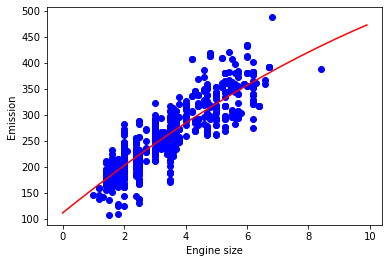

In [3]:
# Polynomial regression - Sometimes, the trend of data is not really linear, and looks curvy. 
#In this case we can use Polynomial regression methods.
#relationship between the independent variable x and the dependent variable y 
#is modeled as an nth degree polynomial in x.
# y= a0 + a1*x +a2* square(x)
# we will create a few additional features: b,  x , and  sq(x) .

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score

df = pd.read_csv("FuelConsumption.csv")
#print(df.head)  # it gives overall rows and column

#print(df.describe()) # this will give the statistic data of data

# These are the features we will for regression
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
#print(cdf.head(9)) # first 9 elements from the excel sheet

viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

#plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
#plt.xlabel("FUELCONSUMPTION_COMB")
#plt.ylabel("Emission")

msk = np.random.rand(len(df)) < 0.8  #select random rows
#print(msk)
train = cdf[msk]
test = cdf[~msk]
#print(train[['ENGINESIZE']])
#print(test[['ENGINESIZE']])


#plt.hist(train)
#plt.show()
#plt.scatter(train[['ENGINESIZE']], train[['CO2EMISSIONS']],  color='blue')
#plt.xlabel("Engine size")
#plt.ylabel("Emission")


# create model
#regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])  # asanarray - converts list into array
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(train[['ENGINESIZE']])  # asanarray - converts list into array
test_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2) # b + a1*x +a2* square(x) 
train_x_poly = poly.fit_transform(train_x)  # y=b0+b1*x +b2*sq(x) : x  with  ??1 ,  square(x) with  x2 
#train_x_poly

# after converting non- linear relationship to linear relationship: we will use linear model to fit the data
poly_regr = linear_model.LinearRegression()


poly_regr.fit(train_x_poly, train_y) # model design with training data
# The coefficients -the parameters of the fit line
print('Coefficients: ', poly_regr.coef_)
print('Intercept: ',poly_regr.intercept_)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue') # data plot


XX = np.arange(0.0, 10.0, 0.1)
yy = poly_regr.intercept_[0]+ poly_regr.coef_[0][1]*XX+ poly_regr.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )


#YY = poly_regr.coef_[0][1]*XX + poly_regr.coef_[0][2]* np.power(XX,2) + poly_regr.intercept_[0]
#plt.plot(train_x_poly,YY , '-r') # y = m*x + m*sqr(x)+c
plt.xlabel("Engine size")
plt.ylabel("Emission")


#test_x = np.asanyarray(test[['ENGINESIZE']])   # asanyarray : converts List into array
test_x_poly = poly.fit_transform(test_x)


test_y1 = poly_regr.predict(test_x_poly) # through regression model predicts the test data

#a=len(test_y1)
#b=len(test_y)
#c=len(test_x)
#d=len(test_x_poly)
#print(a)
#print(b)
#print(c)
#print(d)
# check Error and accuracy using 3 paramters -
# (1) Mean absolute error
# (2) Mean squared error
# (3) Rsquared accuracy measure - how close the data are to the fitted regression line.
#     The higher the R-squared, the better the model fits your data

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y1 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y1 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y1 , test_y) )


